# Manifold Representation

We represent the features of the environment as points on the surface of an N-dimensional spherical manifold. This was chosen to have an internal consistency in the representations to enable interpolation and to better represent that the real world is structured and representationally consistent. N is chosen to be 3 to form RGB colors for the purposes of rendering, thus the manifold is a sphere, however other dimensions should also work.

- https://en.wikipedia.org/wiki/Ball_(mathematics)
- https://arxiv.org/abs/1704.05310

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

In [4]:
samples = 1000
ndims = 3
num_entities = 5

# unit vectors
unit_vec = np.random.normal(loc=0, scale=1, size=(samples, ndims))
unit_vec = unit_vec / np.linalg.norm(unit_vec, ord=2, axis=-1, keepdims=True)

unit_palette = (unit_vec + 1) / 2

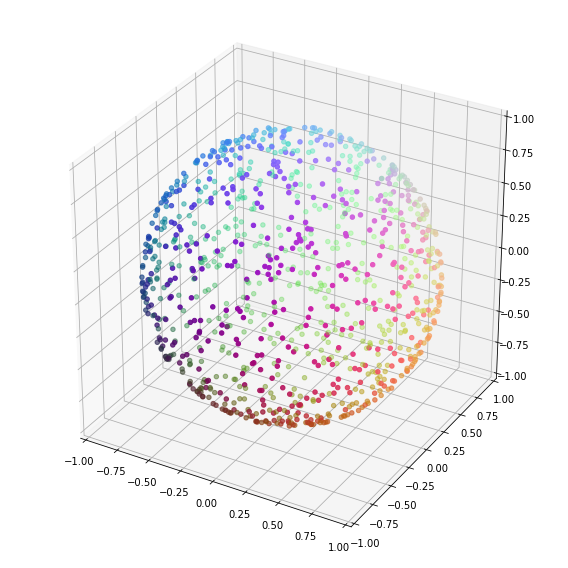

In [5]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='3d'))

ax.scatter(unit_vec[:, 0], unit_vec[:, 1], unit_vec[:, 2], c=unit_palette, depthshade=True)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.tight_layout()

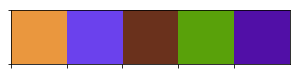

In [6]:
sns.palplot(unit_palette[:num_entities])

In [ ]:
a = angle to rotate
[x, y, z] = axis to rotate around (unit vector)

R = [cos(a/2), sin(a/2)*x, sin(a/2)*y, sin(a/2)*z]

def axisangle_to_q(v, theta):
    v = normalize(v)
    x, y, z = v
    theta /= 2
    w = cos(theta)
    x = x * sin(theta)
    y = y * sin(theta)
    z = z * sin(theta)
    return w, x, y, z

def q_to_axisangle(q):
    w, v = q[0], q[1:]
    theta = acos(w) * 2.0
    return normalize(v), theta